In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# generate data

# period parts:

x = np.linspace(0, 1, 500)
# trend = [ lambda x: 20*(x-0.5)**2, lambda x: 50*(x-1)**3, lambda x: -10*x]


trend = [ lambda x: -10*x]

season = [lambda x: 1*np.sin(20*np.pi*x), lambda x:1 *np.cos(40*np.pi*x),lambda x: 1*np.sin(60*np.pi*x) ]



(3, 500) (1, 500) (4, 500)
(4, 4)


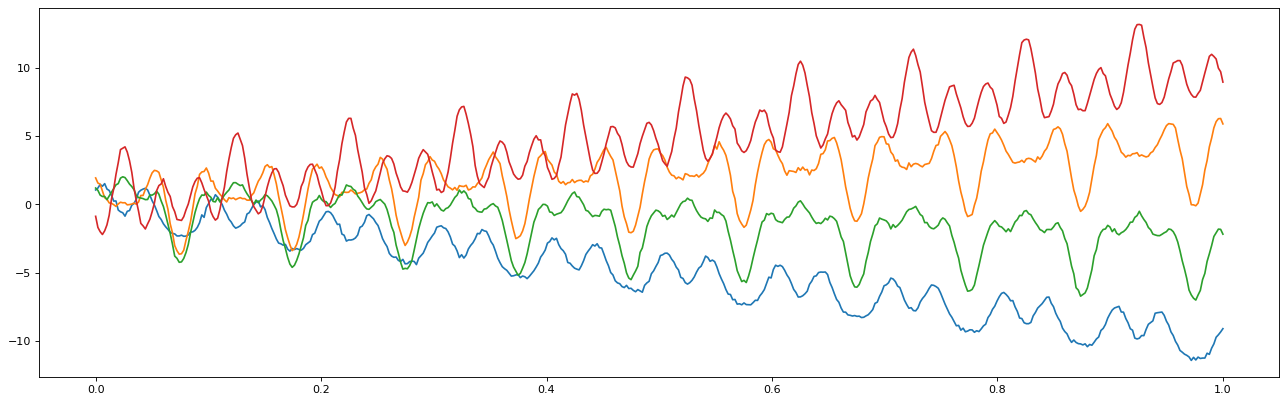

In [70]:
season_base = np.stack([season[i](x) for i in range(len(season))], axis=0)
trend_base = np.stack([trend[i](x) for i in range(len(trend))], axis=0)

base = np.concatenate([ trend_base,season_base,], axis=0)
print(season_base.shape, trend_base.shape, base.shape)

# generate data


# weight = np.array(
# [[2,-2,1,1,0,0],
#  [-5,0,1,0,2,-1],
# ]
# )

# weight = np.array(
# [[0,0,1,1,1,0.5], 
#  [0,0,-0.5,1,2,-1],
#  [0,0,1.5,1,1,-1],
#  [0,0,-1,1,-1,-1], 
# ]
# )

weight = np.array(
[[1,1,1,0.5], 
 [-0.4,1,2,-1],
 [0.3,2,1,-1],
 [-1,1,-1,-2], 
]
)

np.random.seed(12)

print(weight.shape)

data = np.matmul(weight, base) + np.random.normal(0,0.1, size=(weight.shape[0], base.shape[1]))
data_clean =  np.matmul(weight, base)

# set figure size
plt.figure(figsize=(20, 6), dpi=80)

plt.plot(x, data[0,:]) 
plt.plot(x, data[1,:])
plt.plot(x, data[2,:])
plt.plot(x, data[3,:])
# plt.plot(x, data[4,:])
# plt.plot(x, data[5,:])
# plt.show()

In [71]:
data_save = {}
data_save['ndims'] = data.shape

data_save['raw_data'] = data

data_save['clean_data'] = data_clean

data_save['weight'] = weight

data_save['data'] = []

# sorted unique timestamps, set as (normalized to 0-1 ) regular time intervals at current stage
data_save['time_uni'] = np.linspace(0,1,data.shape[1])

def generate_random_mask( shape, drop_rate=0.2, valid_rate=0.1):
    """
    train_ratio: 1-valid_rate-drop_rate
    test_ratio: drop_rate
    valid_ratio: valid_rate
    """
    N,T = shape

    mask_train_list = []
    mask_test_list = []
    mask_valid_list = []

    for t in range(T):

        mask = np.random.rand(N)
        mask_train = np.where(mask>drop_rate+valid_rate, 1, 0)
        mask_test = np.where(mask<drop_rate, 1, 0)
        mask_valid = np.where((mask>drop_rate) & (mask<drop_rate+valid_rate), 1, 0)

        mask_train_list.append(mask_train)
        mask_test_list.append(mask_test)
        mask_valid_list.append(mask_valid)
    
    mask_train = np.stack(mask_train_list, axis=1)
    mask_test = np.stack(mask_test_list, axis=1)
    mask_valid = np.stack(mask_valid_list, axis=1)

    return mask_train, mask_test, mask_valid

fold = 2
drop_rate = 0.8
valid_rate = 0.0

for i in range(fold):
    mask_train, mask_test, mask_valid = generate_random_mask(data.shape, drop_rate, valid_rate)
    data_save['data'].append({'mask_train':mask_train, 'mask_test':mask_test, 'mask_valid':mask_valid})

file_name = '../simu/simu_impute'+'_r_%.1f'%(drop_rate)+'.npy'
np.save(file_name, data_save)
